<h1> <center> Auto-Regressive Integrated Moving Average (ARIMA) </center> </h1>

<hr></hr>

<h2><center>Objectives</center><h2>

In this module, we will learn 

- What is ARIMA?
- How ARIMA works?
- Components of the ARIMA model
- Training ARIMA model
- Testing ARIMA model
- Forcasting using trained ARIMA model

<hr></hr>

A few points to understand ARIMA model are given below.

1. Auto-Regressive Integrated Moving Average (ARIMA) is a time series model that uses the information in the past time series values to make future predictions. 
2. The information found in the past values will indicate the nature of the future predictions. 
3. For example, an ARIMA model can predict future stock prices after observing and analyzing previous stock prices.
4. The ARIMA model will use the single time-dependent (univariate) variable in the time series to make predictions. 
5. <b>ARIMA models only work when the time series is stationary.</b>

<hr></hr>

<h2><center>Loading the Dataset</center></h2>


We will prepare the sales dataset. The dataset will build a time series model that predicts monthly cold-drinks sales.

The dataset shows monthly sales from 1964 to 1972. 

We will build the model on the training dataset and make predictions using the test dataset.


<hr></hr>

In [1]:
# We will use the Pandas library to load the dataset.
import pandas as pd
# Use this code to read the data:
df = pd.read_csv('monthly-sales.csv')
# To display the first five data points of the dataset, use this code:
df.head()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [2]:
# To display the last five data points of the dataset, use this code:
df.tail()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0
105,NaN,NaN
106,Perrin Freres monthly champagne sales millions...,NaN


<hr></hr>
From this output, the 105th and the 106th data points/rows have missing values. We will have to drop these data points. We also have to rename the columns.
<hr></hr>

<h2><center>Renamaing columns</center></h2>

In [4]:
df.columns=["Month","Sales"]
df.head()

,Month,Sales
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


<h2><center>Drop the data points</center></h2>

To drop the 105th and the 106th data points/rows, use this code:

In [10]:
df.dropna(axis=0,inplace=True)
df.dropna(axis=0,inplace=True)
df.tail()

,Month,Sales
100,1972-05,4618.0
101,1972-06,5312.0
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0


We have dropped these rows. The new dataset will now have 104 data points/rows.
<hr></hr>

<h2><center>Converting the ‘month’ column</center></h2>

We need to convert the month column to a DateTime format. This format allows us to perform time-series analysis. We will use the pd.to_datetime function.

In [11]:
df['Month']=pd.to_datetime(df['Month'])
df.head()

,Month,Sales
0,1964-01-01,2815.0
1,1964-02-01,2672.0
2,1964-03-01,2755.0
3,1964-04-01,2721.0
4,1964-05-01,2946.0


We also need to set the month column as the index column. Use this code:

In [12]:
df.set_index('Month',inplace=True)
df.head()

,Sales
Month,
1964-01-01,2815.0
1964-02-01,2672.0
1964-03-01,2755.0
1964-04-01,2721.0
1964-05-01,2946.0




<h2><center>Visualizing the time series data</center></h2>

We need to convert the month column to a DateTime format. This format allows us to perform time-series analysis. We will use the pd.to_datetime function.

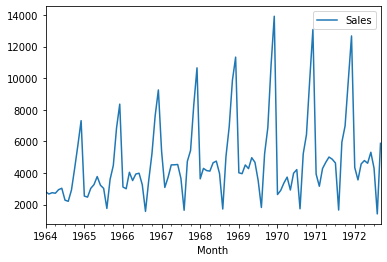

In [13]:
import matplotlib.pyplot as plt
df.plot()
plt.show()

<hr></hr>

The line chart plots the sales against month. Through visualization, the time series has seasonality or repeating cycles. The spikes and dips keep on repeating during certain months of the year.

We can conclude that the time series is non-stationary since it has seasonality. We still need to perform a statistical test on the time series to prove this non-stationarity. As mentioned earlier, we will use the Augmented Dickey-Fuller test.

<hr></hr>

<h2><center>Implementing Augmented Dickey-Fuller test</center></h2>


We import the Augmented Dickey-Fuller tool as follows:

In [14]:
from statsmodels.tsa.stattools import adfuller
# We initialize the adfuller function and pass the sales column as follows:
passing_data=adfuller(df['Sales'])
# We will create a function that will check for dataset stationarity. 
# We just need to prove what we have observed earlier on the line chart.
def adf_test(sales):
    result=adfuller(sales)
    labels = ['Test parameters', 'p-value','#Lags Used','Dataset observations']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("Dataset is stationary")
    else:
        print("Dataset is non-stationary ")

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


<hr></hr>
The ADF test will check for stationarity. The p-value will determine whether the time series is stationary. When the p-value of the ADF test is less than 0.05, then the time series is stationary. We then apply the function to the Sales column to know the ADF test results and get the p-value.
<hr></hr>

In [15]:
adf_test(df['Sales'])

Test parameters : -1.8335930563276188
p-value : 0.363915771660247
#Lags Used : 11
Dataset observations : 93
Dataset is non-stationary 


<hr></hr>
From the output above, we have different output values that show the nature of our dataset. We are only interested in the p-value result. The p-value is 0.363915771660247.

This number is greater than 0.05. It implies that the time series is non-stationary. We will have to make the time series stationary using the differencing approach.
<hr></hr>

<h2><center>Implementing differencing</center></h2>

This approach finds the difference between the current monthly values and the previous monthly values in the time series. We will difference only once, therefore our d=1.

In [16]:
df['Differencing']=df['Sales']-df['Sales'].shift(12)

We again perform the Augmented Dickey-Fuller test to check whether the time series has become stationary.

In [17]:
adf_test(df['Differencing'].dropna())

Test parameters : -7.626619157213166
p-value : 2.0605796968136632e-11
#Lags Used : 0
Dataset observations : 92
Dataset is stationary


From the test results the p-value is 2.519620447387081e-10 (0.0000000002519620447387081). This number is < 0.05, therefore the dataset has become stationary. We will plot this new time series to see whether we have removed the seasonal components.

<h2><center>Plotting the new dataset</center></h2>

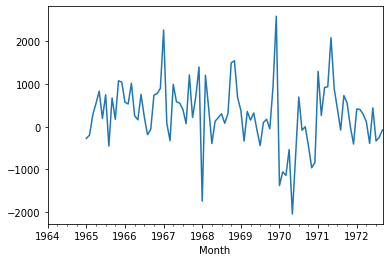

In [18]:
df['Differencing'].plot()
plt.show()

From the output above, we have removed the seasonal components. We can start applying the ARIMA model to the dataset.

<h2><center>Implementing the ARIMA model</center></h2>

As mentioned earlier, we initialize the ARIMA model as ARIMA (p,d,q). So we need to get the values of these parameters. We have already discussed the function of each parameter.

We already know the d=1. It is because we have performed differencing only once. The next step is to get the best p and q values.

<b>Getting the best ‘p’ and ‘q’ values</b>

We get the best value of q using an Autocorrelation Function (ACF) plot.

We get the best value of p using a Partial Autocorrelation Function (PACF) plot.

Lets import PACF and ACF.

In [19]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm

<h2><center>Plotting ACF</center></h2>

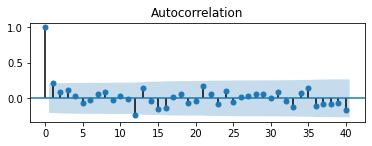

In [30]:
fig = plt.figure()
ax1 = fig.add_subplot(211)
fig1 = sm.graphics.tsa.plot_acf(df['Differencing'].iloc[13:],lags=40,ax=ax1)

We will use this plot to get the best value of q. From the ACF plot, lag number one stands out. The red arrow shows the lag point. It is slightly above (cuts off) the significance line (the blue line). We will select this lag as the best value of q. Therefore, q=1.

<h2><center>Plotting PACF</center></h2>

In [31]:
ax2 = fig.add_subplot(212)
fig2 = sm.graphics.tsa.plot_pacf(df['Differencing'].iloc[13:],lags=40,ax=ax2)

We will use this plot to get the best value of p. From the PACF plot, we can observe that lags 1 and 13 stand out. The red arrow shows the lag points.

These points are above (cuts off) the significance line (the blue shaded line). We select lag number one as the best value of p. It is the first lag that is above the blue line. Therefore, p=1.

Our values will be: p=1, d=1 and q=1. The next step is to import the ARIMA model.

<h2><center>Import the ARIMA model</center></h2>

In [32]:
from statsmodels.tsa.arima_model import ARIMA

# We initialize the model as follows:

model=ARIMA(df['Sales'],order=(1,1,1))

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


<h2><center>Training the ARIMA model</center></h2>

We use fit function to train the ARIMA model. The ARIMA model will learn from the time series dataset.

In [33]:
arima_model=model.fit()

We have trained the ARIMA model. We can use it to predict the test dataset. The prediction will show the actual monthly sales and the predicted (forecast) sales.

<h2><center>Testing the ARIMA model using the test dataset</center></h2>

We will use the values from the 90th row to the 103rd row as the test portion/set. We will then use Matplotlib to show the actual and the predicted (forecast) monthly sales.


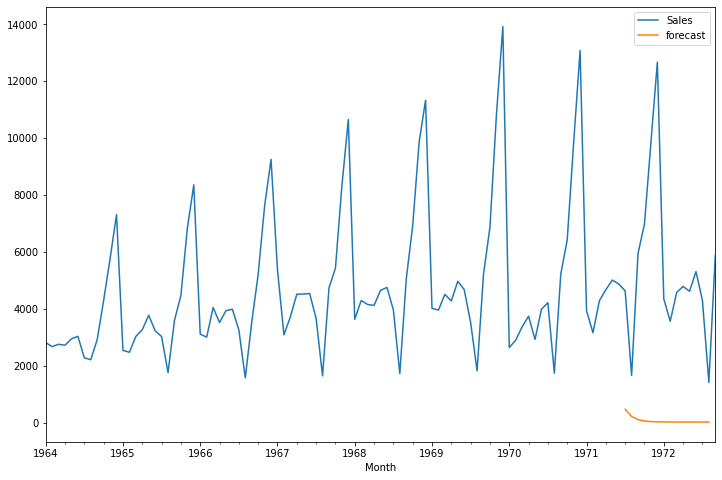

In [34]:
df['forecast']=arima_model.predict(start=90,end=103,dynamic=True)
df[['Sales','forecast']].plot(figsize=(12,8))

From the output above:

- The blue line is the actual monthly sales.
- The orange line is the forecast sales.

The ARIMA model has not performed well since it has not made correct predictions. The orange line is far apart from the blue line. We will now build another time series model using SARIMA to improve the performance.

<h2> Implementing the SARIMA model </h2>

SARIMA will handle and model time series data with repeating cycles or seasonality. From the earlier ADF test, the dataset has seasonality. We initialize the SARIMA model as SARIMA (p,d,q)(P, D, Q, s). We already have the p, d, and q values.

We can get the P, D, Q in the same way. Thus, p=P, q=Q, and d=D. s=12 since there are 12 months in a year. We initialize the SARIMA model as follows:

In [35]:
model=sm.tsa.statespace.SARIMAX(df['Sales'],order=(1, 1, 1),seasonal_order=(1,1,1,12))

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


<h2> Training the SARIMA model </h2>


We use fit function to train the SARIMA model. The SARIMA model will learn from the time series dataset.

In [36]:
sarima_model=model.fit()

We have trained the SARIMA model. We can use it to predict the test dataset. The prediction will show the actual monthly sales and the forecast sales.

<h2> Testing the SARIMA model using the test dataset </h2>

We will also use the values from the 90th row to the 103rd row as the test portion/set. We use Matplotlib to show the actual and the predicted (forecast) sales as follows:

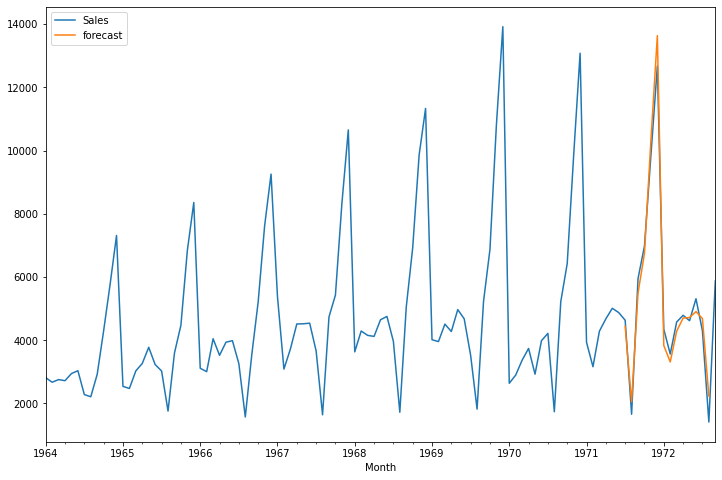

In [37]:
df['forecast']=sarima_model.predict(start=90,end=103,dynamic=True)
df[['Sales','forecast']].plot(figsize=(12,8))

From the output above:

- The blue line is the actual monthly sales.
- The orange line is the forecast sales.


The time series model had made correct predictions since the two lines are close together. The SARIMA model has performed well as compared to the ARIMA model.

<hr></hr>
<h2><center>References</h2></center>

1. [Univariate Time Series Analysis and Forecasting with ARIMA/SARIMA](https://www.section.io/engineering-education/univariate-time-series-analysis-with-arima-in-python/)
